In [1]:
x=1

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import bar

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [4]:
light_cmap = cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.YlGnBu)

In [5]:
df_type = {
    'ARI': 'Bio conservation',
    'NMI': 'Bio conservation',
    'Label ASW': 'Bio conservation',
    'Isolated label ASW': 'Bio conservation',
    'Batch ASW': 'Batch correction',
    'Graph Connectivity': 'Batch correction',
    'Bio conservation': 'Aggregate score',
    'Batch correction': 'Aggregate score',
    'Overall Score': 'Aggregate score',
}
df_type = pd.DataFrame(df_type, index=['Metric Type'])
df_type

,ARI,NMI,Label ASW,Isolated label ASW,Batch ASW,Graph Connectivity,Bio conservation,Batch correction,Overall Score
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [6]:
df_atac = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/multigrate/cond_dim~16_kl~0.01_integ~4000_z_dim~16_ATAC_query.csv', index_col=0, header=0)
df_atac = df_atac.rename(index={0: 'ATAC query'})
df_atac

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
ATAC query,0.745653,0.789803,0.54411,0.542632,0.81203,0.947863,0.745308


In [7]:
df_scrna = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/multigrate/cond_dim~16_kl~0.01_integ~4000_z_dim~16_scRNA_query.csv', index_col=0, header=0)
df_scrna = df_scrna.rename(index={0: 'scRNA query'})
df_scrna

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
scRNA query,0.765281,0.803789,0.48753,0.545823,0.885209,0.955908,0.758587


In [8]:
df_snrna = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/multigrate/cond_dim~16_kl~0.01_integ~4000_z_dim~16_snRNA_query.csv', index_col=0, header=0)
df_snrna = df_snrna.rename(index={0: 'snRNA query'})
df_snrna

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.753626


In [9]:
df_cite = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/multigrate/cond_dim~16_kl~0.01_integ~4000_z_dim~16_CITE-seq_query.csv', index_col=0, header=0)
df_cite = df_cite.rename(index={0: 'CITE query'})
df_cite

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.765984


In [10]:
df_multiome = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/multigrate/cond_dim~16_kl~0.01_integ~4000_z_dim~16_multiome_query.csv', index_col=0, header=0)
df_multiome = df_multiome.rename(index={0: 'multiome query'})
df_multiome

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.766663


In [11]:
df = pd.concat([df_atac, df_scrna, df_snrna, df_cite, df_multiome])
df

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
ATAC query,0.745653,0.789803,0.544110,0.542632,0.812030,0.947863,0.745308
scRNA query,0.765281,0.803789,0.487530,0.545823,0.885209,0.955908,0.758587
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.753626
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.765984
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.766663


In [12]:
df = df.rename(columns={'Isolated label score ASW': 'Isolated label ASW'})

In [13]:
df.loc[:, 'Bio conservation'] = np.mean([df.loc[:, 'ARI'], df.loc[:, 'NMI'], df.loc[:, 'Isolated label ASW'], df.loc[:, 'Label ASW']], axis=0)
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score,Bio conservation
ATAC query,0.745653,0.789803,0.544110,0.542632,0.812030,0.947863,0.745308,0.655550
scRNA query,0.765281,0.803789,0.487530,0.545823,0.885209,0.955908,0.758587,0.650606
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.753626,0.649430
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.765984,0.649009
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.766663,0.651147


In [14]:
df.loc[:, 'Batch correction'] = np.mean([df.loc[:, 'Batch ASW'], df.loc[:, 'Graph Connectivity']], axis=0)
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score,Bio conservation,Batch correction
ATAC query,0.745653,0.789803,0.544110,0.542632,0.812030,0.947863,0.745308,0.655550,0.879947
scRNA query,0.765281,0.803789,0.487530,0.545823,0.885209,0.955908,0.758587,0.650606,0.920558
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.753626,0.649430,0.909920
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.765984,0.649009,0.941447
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.766663,0.651147,0.939937


In [15]:
df = pd.concat([df, df_type])

In [16]:
df = df.rename(columns={'Overall Score': 'Total'})
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Total,Bio conservation,Batch correction
ATAC query,0.745653,0.789803,0.54411,0.542632,0.81203,0.947863,0.745308,0.65555,0.879947
scRNA query,0.765281,0.803789,0.48753,0.545823,0.885209,0.955908,0.758587,0.650606,0.920558
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.753626,0.64943,0.90992
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.765984,0.649009,0.941447
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.766663,0.651147,0.939937
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [17]:
acc_df = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/knn_accuracies.csv', index_col=0)
acc_df

,ATAC query,CITE query,snRNA query,scRNA query,multiome query
accuracy,0.56,0.872434,0.769036,0.856961,0.783373


In [18]:
acc_df = acc_df.rename(index={'accuracy': 'Transfer accuracy'})
acc_df['Metric Type'] = 'Aggregate score'
acc_df

,ATAC query,CITE query,snRNA query,scRNA query,multiome query,Metric Type
Transfer accuracy,0.56,0.872434,0.769036,0.856961,0.783373,Aggregate score


In [19]:
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Total,Bio conservation,Batch correction
ATAC query,0.745653,0.789803,0.54411,0.542632,0.81203,0.947863,0.745308,0.65555,0.879947
scRNA query,0.765281,0.803789,0.48753,0.545823,0.885209,0.955908,0.758587,0.650606,0.920558
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.753626,0.64943,0.90992
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.765984,0.649009,0.941447
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.766663,0.651147,0.939937
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [20]:
df = df.join(acc_df.T)

In [21]:
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Total,Bio conservation,Batch correction,Transfer accuracy
ATAC query,0.745653,0.789803,0.54411,0.542632,0.81203,0.947863,0.745308,0.65555,0.879947,0.56
scRNA query,0.765281,0.803789,0.48753,0.545823,0.885209,0.955908,0.758587,0.650606,0.920558,0.856961
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.753626,0.64943,0.90992,0.769036
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.765984,0.649009,0.941447,0.872434
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.766663,0.651147,0.939937,0.783373
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score,Aggregate score


In [22]:
df = df.drop(columns=['Total'])
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Bio conservation,Batch correction,Transfer accuracy
ATAC query,0.745653,0.789803,0.54411,0.542632,0.81203,0.947863,0.65555,0.879947,0.56
scRNA query,0.765281,0.803789,0.48753,0.545823,0.885209,0.955908,0.650606,0.920558,0.856961
snRNA query,0.740454,0.788428,0.530981,0.537858,0.870965,0.948876,0.64943,0.90992,0.769036
CITE query,0.750314,0.804556,0.493925,0.547239,0.927797,0.955098,0.649009,0.941447,0.872434
multiome query,0.739974,0.793761,0.525872,0.544979,0.928873,0.951001,0.651147,0.939937,0.783373
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [23]:
score_cols = df.columns[df.loc['Metric Type'] == 'Aggregate score']
other_cols = df.columns[df.loc['Metric Type'] != 'Aggregate score']

In [24]:
score_cols

Index(['Bio conservation', 'Batch correction', 'Transfer accuracy'], dtype='object')

In [25]:
plot_df = df.drop('Metric Type', axis=0)

In [26]:
plot_df = plot_df.sort_values(by="Transfer accuracy", ascending=False).astype(np.float64)

In [27]:
plot_df["Method"] = plot_df.index

In [28]:
column_definitions = [
    ColumnDefinition("Method", width=1.5, textprops={"ha": "left", "weight": "bold"}),
]

In [29]:
cmap_fn = lambda col_data: normed_cmap(col_data, cmap=matplotlib.cm.PRGn, num_stds=2.5)

# Circles for the metric values
column_definitions += [
    ColumnDefinition(
        col,
        title=col.replace(" ", "\n", 1),
        width=1,
        textprops={
            "ha": "center",
            "bbox": {"boxstyle": "circle", "pad": 0.25},
        },
        cmap=cmap_fn(plot_df[col]),
        group=df.loc['Metric Type', col],
        formatter="{:.2f}",
    )
    for i, col in enumerate(other_cols)
]

In [30]:
cmap_fn = lambda col_data: normed_cmap(col_data, cmap=light_cmap, num_stds=2.5)

# Bars for the aggregate scores
column_definitions += [
    ColumnDefinition(
        col,
        width=1,
        title=col.replace(" ", "\n", 1),
        plot_fn=bar,
        plot_kw={
            "cmap": cmap_fn(plot_df[col]),
            "plot_bg_bar": False,
            "annotate": True,
            "height": 0.9,
            "formatter": "{:.2f}",
        },
        group=df.loc['Metric Type', col],
        border="left" if i == 0 else None,
    )
    for i, col in enumerate(score_cols)
]

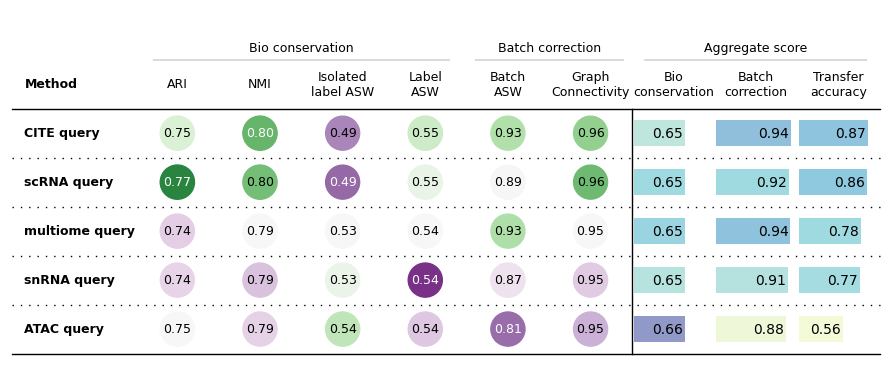

In [31]:
num_embeds = len(plot_df)

# Allow to manipulate text post-hoc (in illustrator)
with matplotlib.rc_context({"svg.fonttype": "none"}):
    fig, ax = plt.subplots(figsize=(len(df.columns) * 1.25, 3 + 0.3 * num_embeds))
    tab = Table(
        plot_df,
        cell_kw={
            "linewidth": 0,
            "edgecolor": "k",
        },
        column_definitions=column_definitions,
        ax=ax,
        row_dividers=True,
        footer_divider=True,
        textprops={"fontsize": 9, "ha": "center"},
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
        column_border_kw={"linewidth": 1, "linestyle": "-"},
        index_col="Method",
    ).autoset_fontcolors(colnames=plot_df.columns)

plt.savefig('figures/scib_metrics_queries.svg', bbox_inches='tight')